In [3]:
# Make sure you choose a runtime environment
# Depending on what you are doing, you will need a CPU or GPU.
# However, when doing GenAI, most of the time we are going to need
# a GPU.

# Runtime -> Change Runtime Type

# Then, press "Connect" in the upper right section of the browser

# Comparison of Colab GPUs
# http://mccormickml.com/2024/04/23/colab-gpus-features-and-pricing/


# Greet me with the current time!
import datetime, pytz

current_time = datetime.datetime.now(pytz.timezone('US/Eastern')).strftime("%H:%M")
print(f"Hello CART498, it is {current_time}")

Hello CART498, it is 21:45


In [4]:
import torch

# Torch (and PyTorch) PyTorch is one of the most popular frameworks for
#  developing and training machine learning and deep learning models.

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# CUDA (Compute Unified Device Architecture) is a parallel computing platform
# and programming model developed by NVIDIA for their GPUs. CUDA harness the
# highly parallel processing power of GPUs to perform general-purpose computing
# tasks (i.e., tasks beyond traditional graphics rendering).


Using device: cuda


In [5]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "Lykon/dreamshaper-8",
    # "stabilityai/sd-turbo",
    torch_dtype=torch.float16,
    variant="fp16",
    ).to(device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/796 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/724 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

safety_checker/model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/756 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
CLIPFeatureExtractor appears to have been deprecated in transformers. Using CLIPImageProcessor instead.


  0%|          | 0/50 [00:00<?, ?it/s]

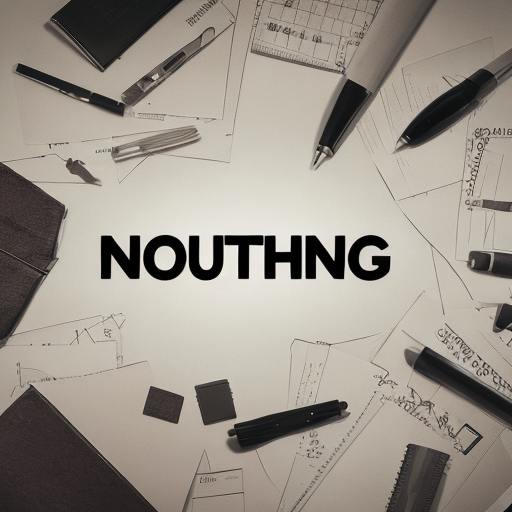

In [6]:
# prompt = "A generative abstract image composed of layered geometric forms, emergent symmetry, controlled randomness, limited palette of three colors, no figurative elements, visual structure suggests algorithmic repetition and drift."
prompt = "nothing"
# prompt = "A fashion editorial image shot in a luxury studio, but styled with everyday objects, improvised materials, visible seams, and imperfections, deliberately resisting polish."
pipe(prompt).images[0]

In [7]:
# We can also use other diffusion models, for example stable diffusion, hosted
# by RunwayML on HuggingFace
from diffusers import DiffusionPipeline

model_id = "segmind/tiny-sd"  # or any other compatible model
# model_id = "stabilityai/sdxl-turbo"
pipe = DiffusionPipeline.from_pretrained(model_id,
                                         dtype=torch.bfloat16, device_map="cuda")


model_index.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/722 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/691 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/755 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder/pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vae/diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.bin:   0%|          | 0.00/647M [00:00<?, ?B/s]

Keyword arguments {'dtype': torch.bfloat16} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe84f/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe84f/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe84f/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe84f/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

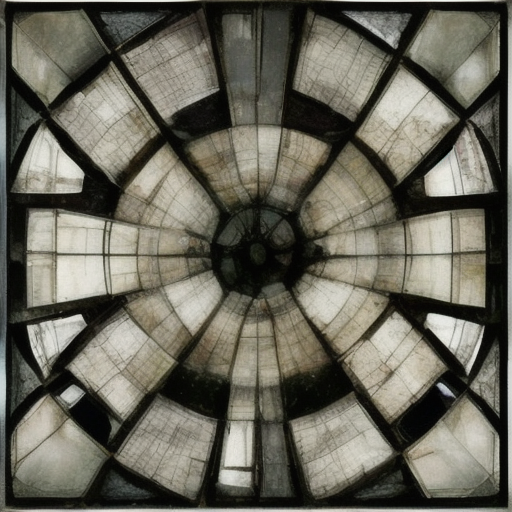

In [8]:
prompt = "synecdoche"
# prompt = "A portrait of a person, neutral expression, natural lighting — no dramatic lighting, no cinematic framing, no fantasy elements, no stylization, no exaggerated features."
# prompt = "An image as if perceived by a non-human sensing system: partial occlusions, uneven resolution, ambiguous scale, artifacts suggesting compression or reconstruction rather than human vision."
pipe(prompt).images[0]

In [ ]:
# Define your prompt
prompt = "singularity"
# prompt = (
#     "A 1950s diner on Mars with hovering cars parked outside, "
#     "in the style of Brazilian bossa nova and MPB album covers, "
#     "cinematic lighting, detailed scene, hyperrealistic textures, "
# )

# Generate and save the image
image = pipe(prompt).images[0]
image

# If instead of displaying the resulting media object we want to save it to the
# Linux machine where you are running your code, you can do:
image.save("output_image.png")

  0%|          | 0/50 [00:00<?, ?it/s]